In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("dataset.csv")
print(df.head())
print(df.isnull().sum())
print(df.info())

  Country           State       City                         Station  \
0   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

    Latitude  Longitude          Last Update Pollutant  Min  Max  Avg  AQI  \
0  16.515083  80.518167  20-11-2023 12:00:00     PM2.5  NaN  NaN  NaN  NaN   
1  16.515083  80.518167  20-11-2023 12:00:00      PM10  NaN  NaN  NaN  NaN   
2  16.515083  80.518167  20-11-2023 12:00:00       SO2  NaN  NaN  NaN  NaN   
3  16.515083  80.518167  20-11-2023 12:00:00        CO  NaN  NaN  NaN  NaN   
4  16.515083  80.518167  20-11-2023 12:00:00     OZONE  NaN  NaN  NaN  NaN   

  Predominant Parameter  
0                   NaN  
1                   NaN  
2                   

In [2]:
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)


In [3]:
print(df.isnull().sum())

Country                  0
State                    0
City                     0
Station                  0
Latitude                 0
Longitude                0
Last Update              0
Pollutant                0
Min                      0
Max                      0
Avg                      0
AQI                      0
Predominant Parameter    0
dtype: int64


In [4]:
df.head(10)

,Country,State,City,Station,Latitude,Longitude,Last Update,Pollutant,Min,Max,Avg,AQI,Predominant Parameter
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16.515083,80.518167,20-11-2023 12:00:00,PM2.5,34.095269,100.117455,60.659054,162.00789,Unknown
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16.515083,80.518167,20-11-2023 12:00:00,PM10,34.095269,100.117455,60.659054,162.00789,Unknown
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16.515083,80.518167,20-11-2023 12:00:00,SO2,34.095269,100.117455,60.659054,162.00789,Unknown
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16.515083,80.518167,20-11-2023 12:00:00,CO,34.095269,100.117455,60.659054,162.00789,Unknown
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16.515083,80.518167,20-11-2023 12:00:00,OZONE,34.095269,100.117455,60.659054,162.00789,Unknown
5,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",14.675886,77.593027,20-11-2023 12:00:00,PM2.5,15.000000,34.000000,24.000000,29.00000,CO
6,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",14.675886,77.593027,20-11-2023 12:00:00,PM10,16.000000,39.000000,24.000000,29.00000,CO
7,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",14.675886,77.593027,20-11-2023 12:00:00,NO2,17.000000,39.000000,23.000000,29.00000,CO
8,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",14.675886,77.593027,20-11-2023 12:00:00,NH3,2.000000,3.000000,3.000000,29.00000,CO
9,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",14.675886,77.593027,20-11-2023 12:00:00,SO2,4.000000,17.000000,7.000000,29.00000,CO


In [5]:
print(df.describe())
print(df['Country'].value_counts())
print(df['State'].value_counts())
print(df['City'].value_counts())
print(df['Pollutant'].value_counts())


          Latitude    Longitude          Min          Max          Avg  \
count  3285.000000  3285.000000  3285.000000  3285.000000  3285.000000   
mean     22.795529    78.455119    34.095269   100.117455    60.659054   
std       5.416659     4.800781    44.156667   110.883612    73.399435   
min       8.514909    70.909168     1.000000     1.000000     1.000000   
25%      19.063214    75.467934     6.000000    21.000000    13.000000   
50%      23.500160    77.296291    18.000000    67.000000    35.000000   
75%      27.213494    80.262850    39.000000   119.000000    71.000000   
max      34.066206    94.636574   357.000000   500.000000   419.000000   

               AQI  
count  3285.000000  
mean    162.007890  
std      95.314515  
min      15.000000  
25%      87.000000  
50%     145.000000  
75%     227.000000  
max     419.000000  
Country
India    3285
Name: count, dtype: int64
State
Maharashtra         569
Uttar_Pradesh       359
Rajasthan           313
Karnataka         

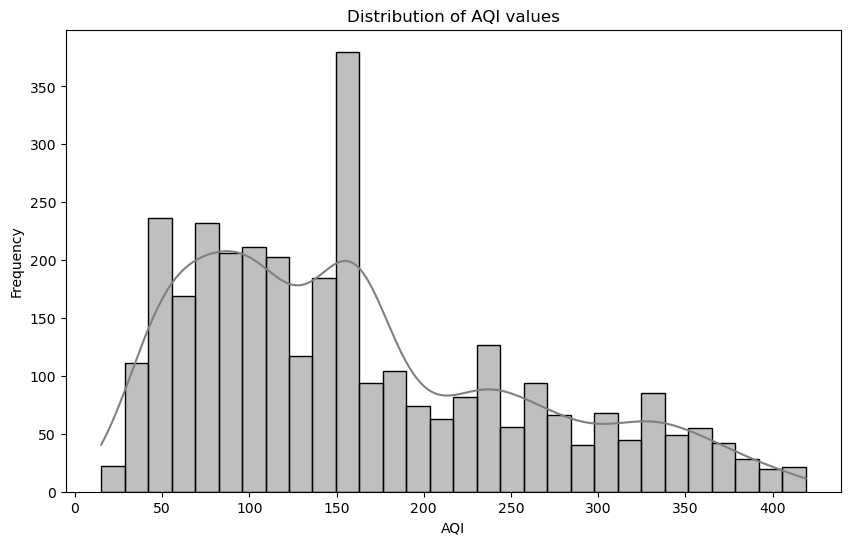

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True,color='grey')
plt.title('Distribution of AQI values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

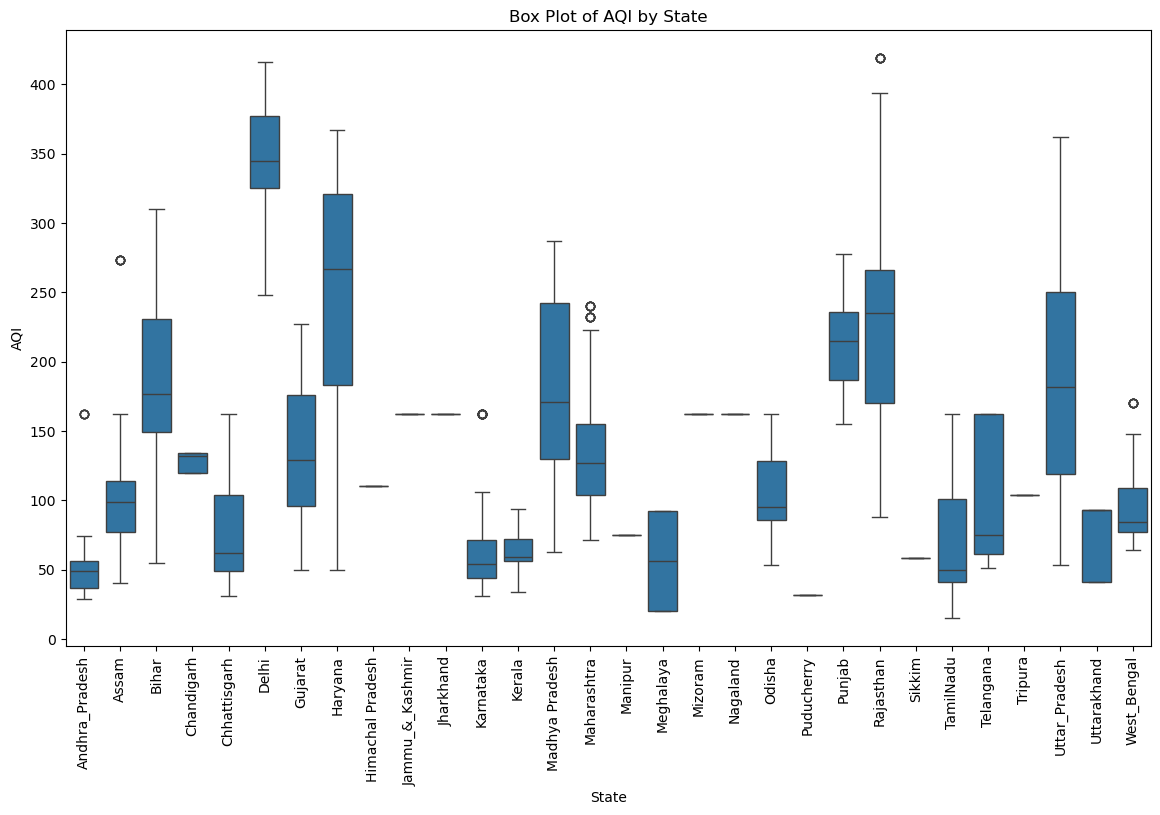

In [7]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='AQI', data=df)
plt.title('Box Plot of AQI by State')
plt.xlabel('State')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

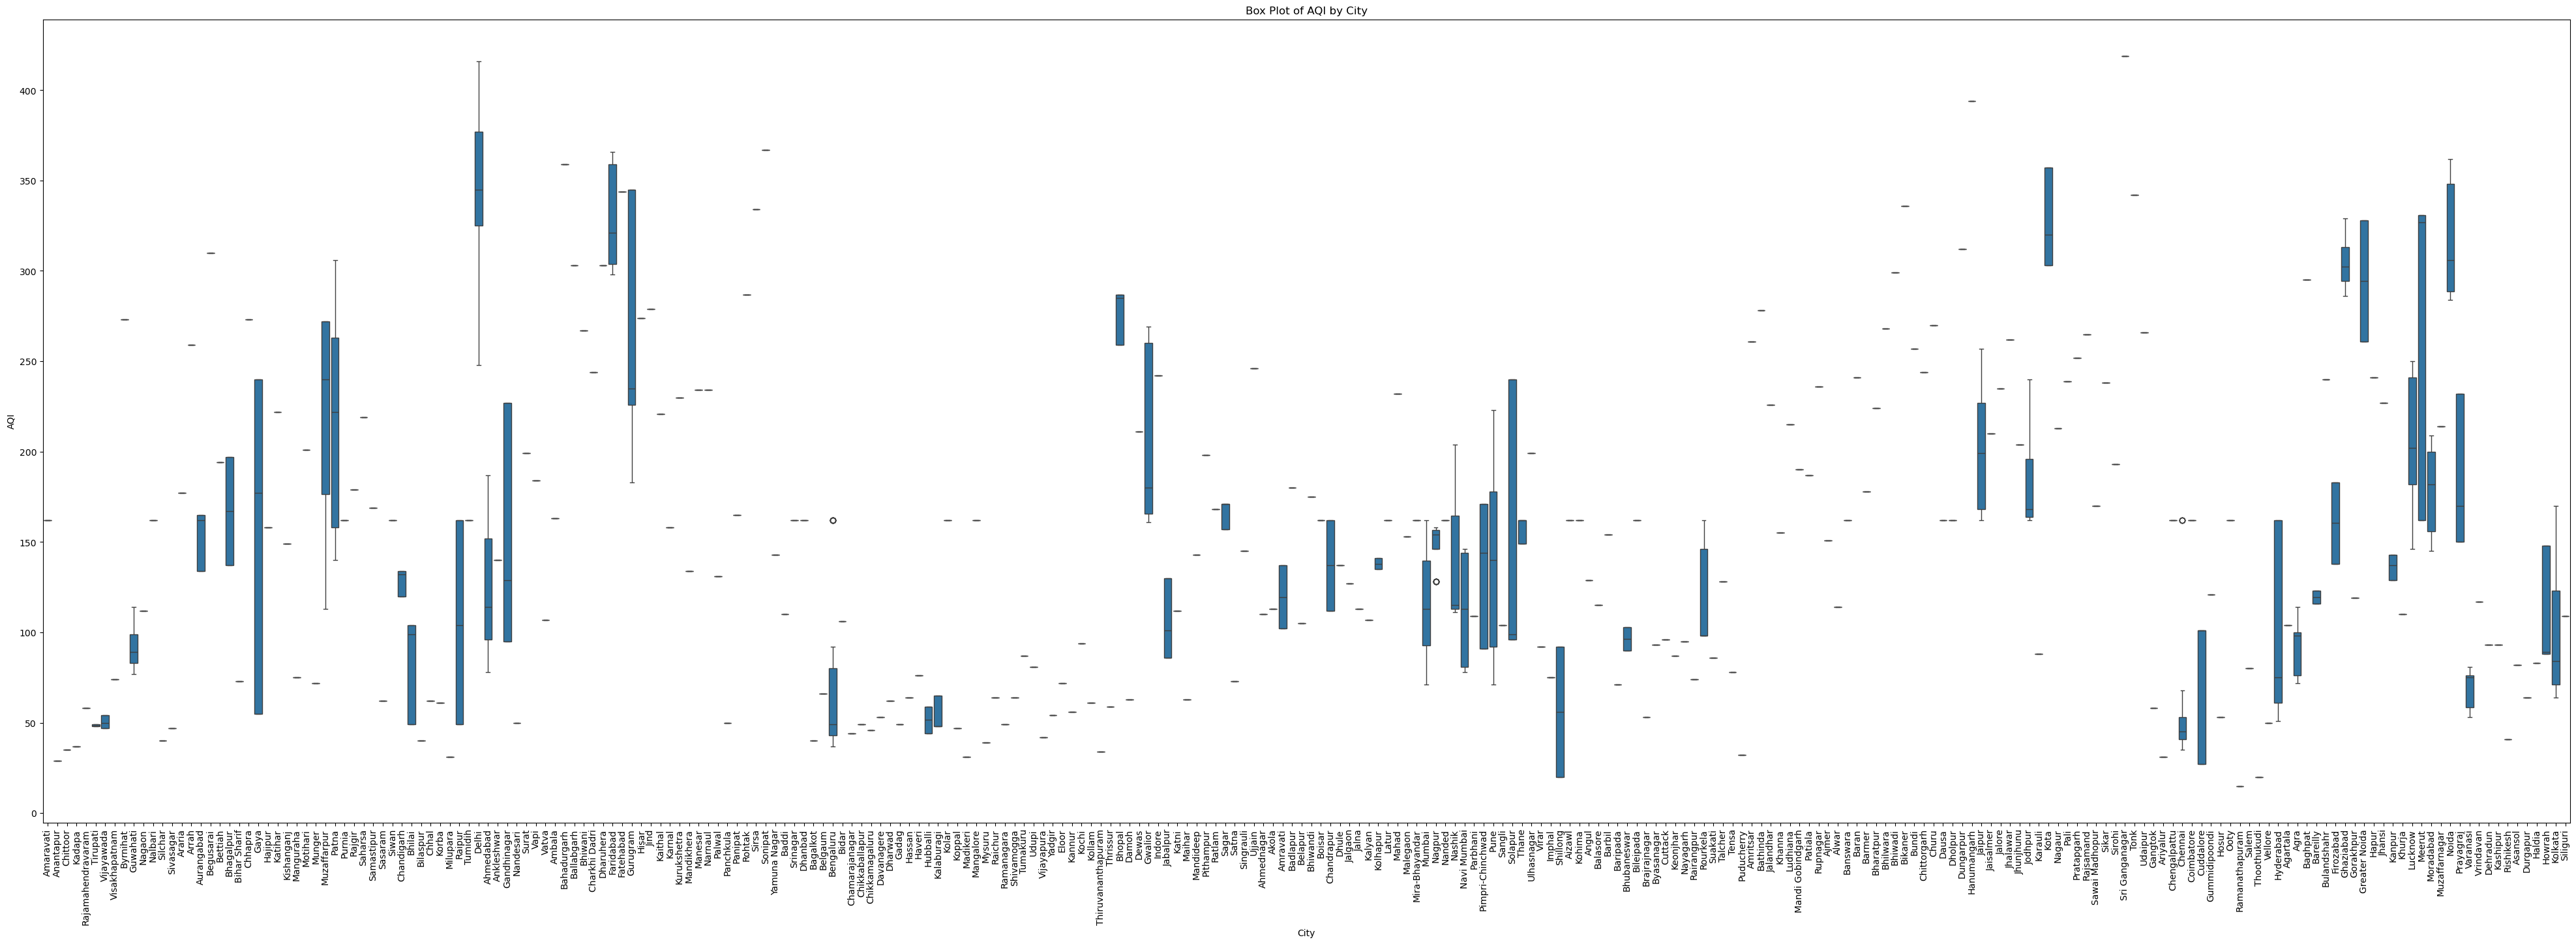

In [8]:
plt.figure(figsize=(50, 16))
sns.boxplot(x='City', y='AQI', data=df)
plt.title('Box Plot of AQI by City')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

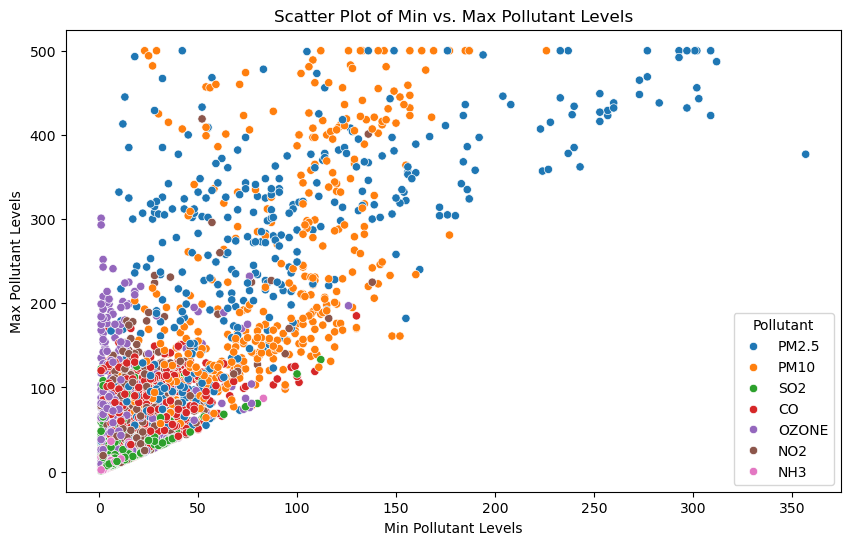

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min', y='Max', hue='Pollutant', data=df)
plt.title('Scatter Plot of Min vs. Max Pollutant Levels')
plt.xlabel('Min Pollutant Levels')
plt.ylabel('Max Pollutant Levels')
plt.show()

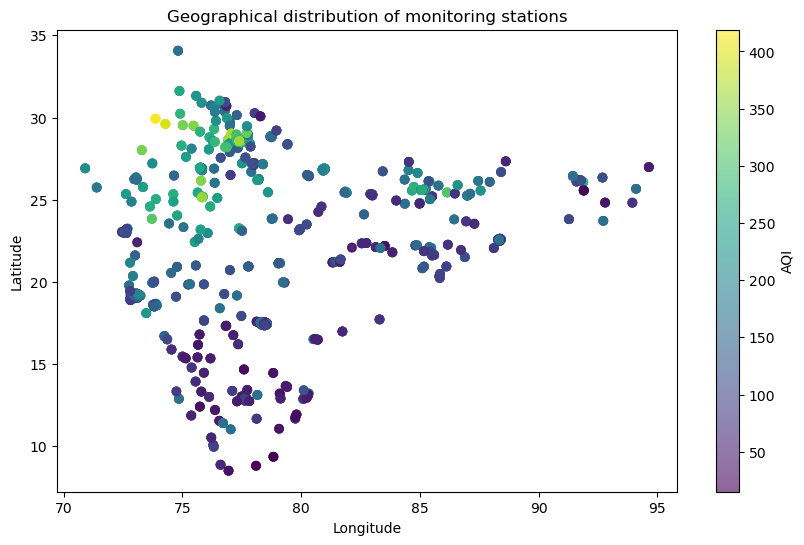

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['AQI'], cmap='viridis', alpha=0.6)
plt.colorbar(label='AQI')
plt.title('Geographical distribution of monitoring stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

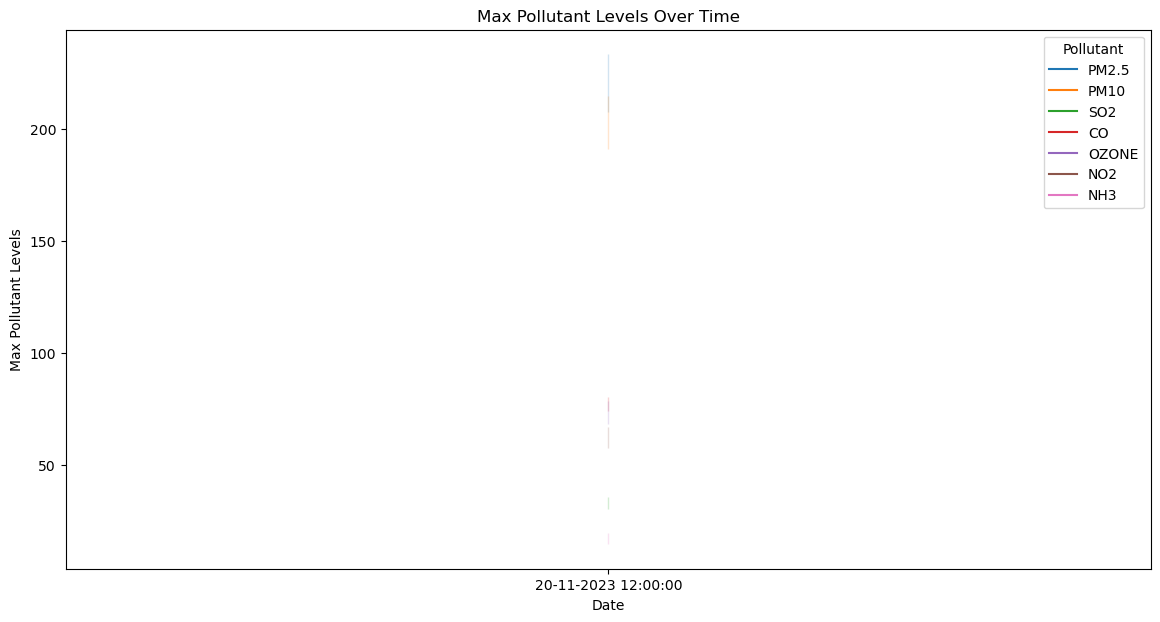

In [11]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Last Update', y='Max', hue='Pollutant', data=df)
plt.title('Max Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Max Pollutant Levels')
plt.show()

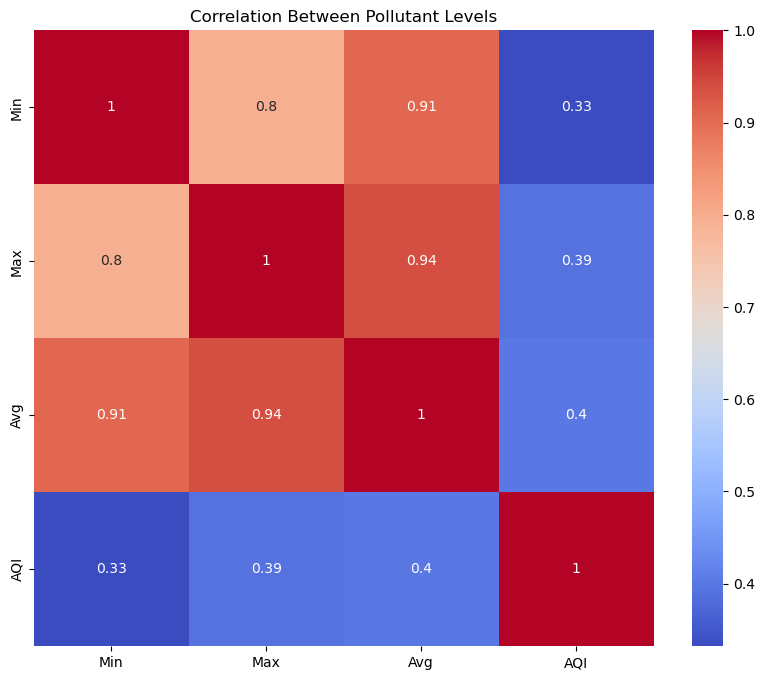

In [12]:
plt.figure(figsize=(10, 8))
correlation = df[['Min', 'Max', 'Avg', 'AQI']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutant Levels')
plt.show()

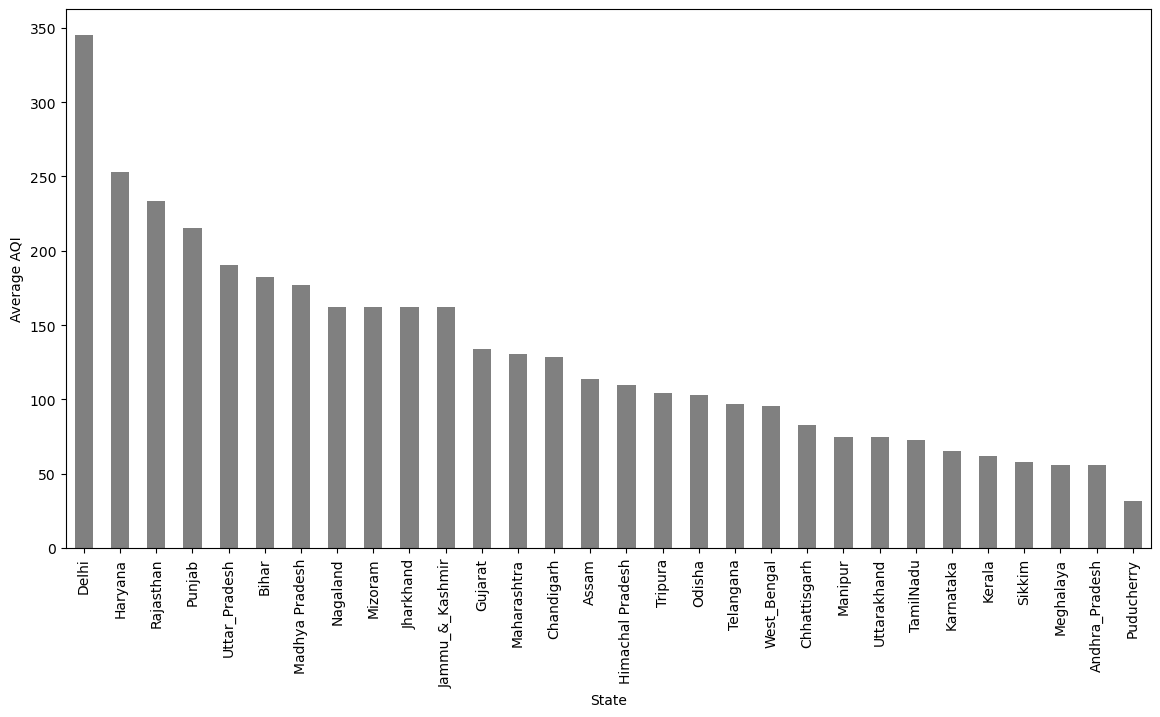

In [13]:
plt.figure(figsize=(14, 7))
state_aqi = df.groupby('State')['AQI'].mean().sort_values(ascending=False)
state_aqi.plot(kind='bar', color='grey')
plt.xlabel('State')
plt.ylabel('Average AQI')
plt.show()

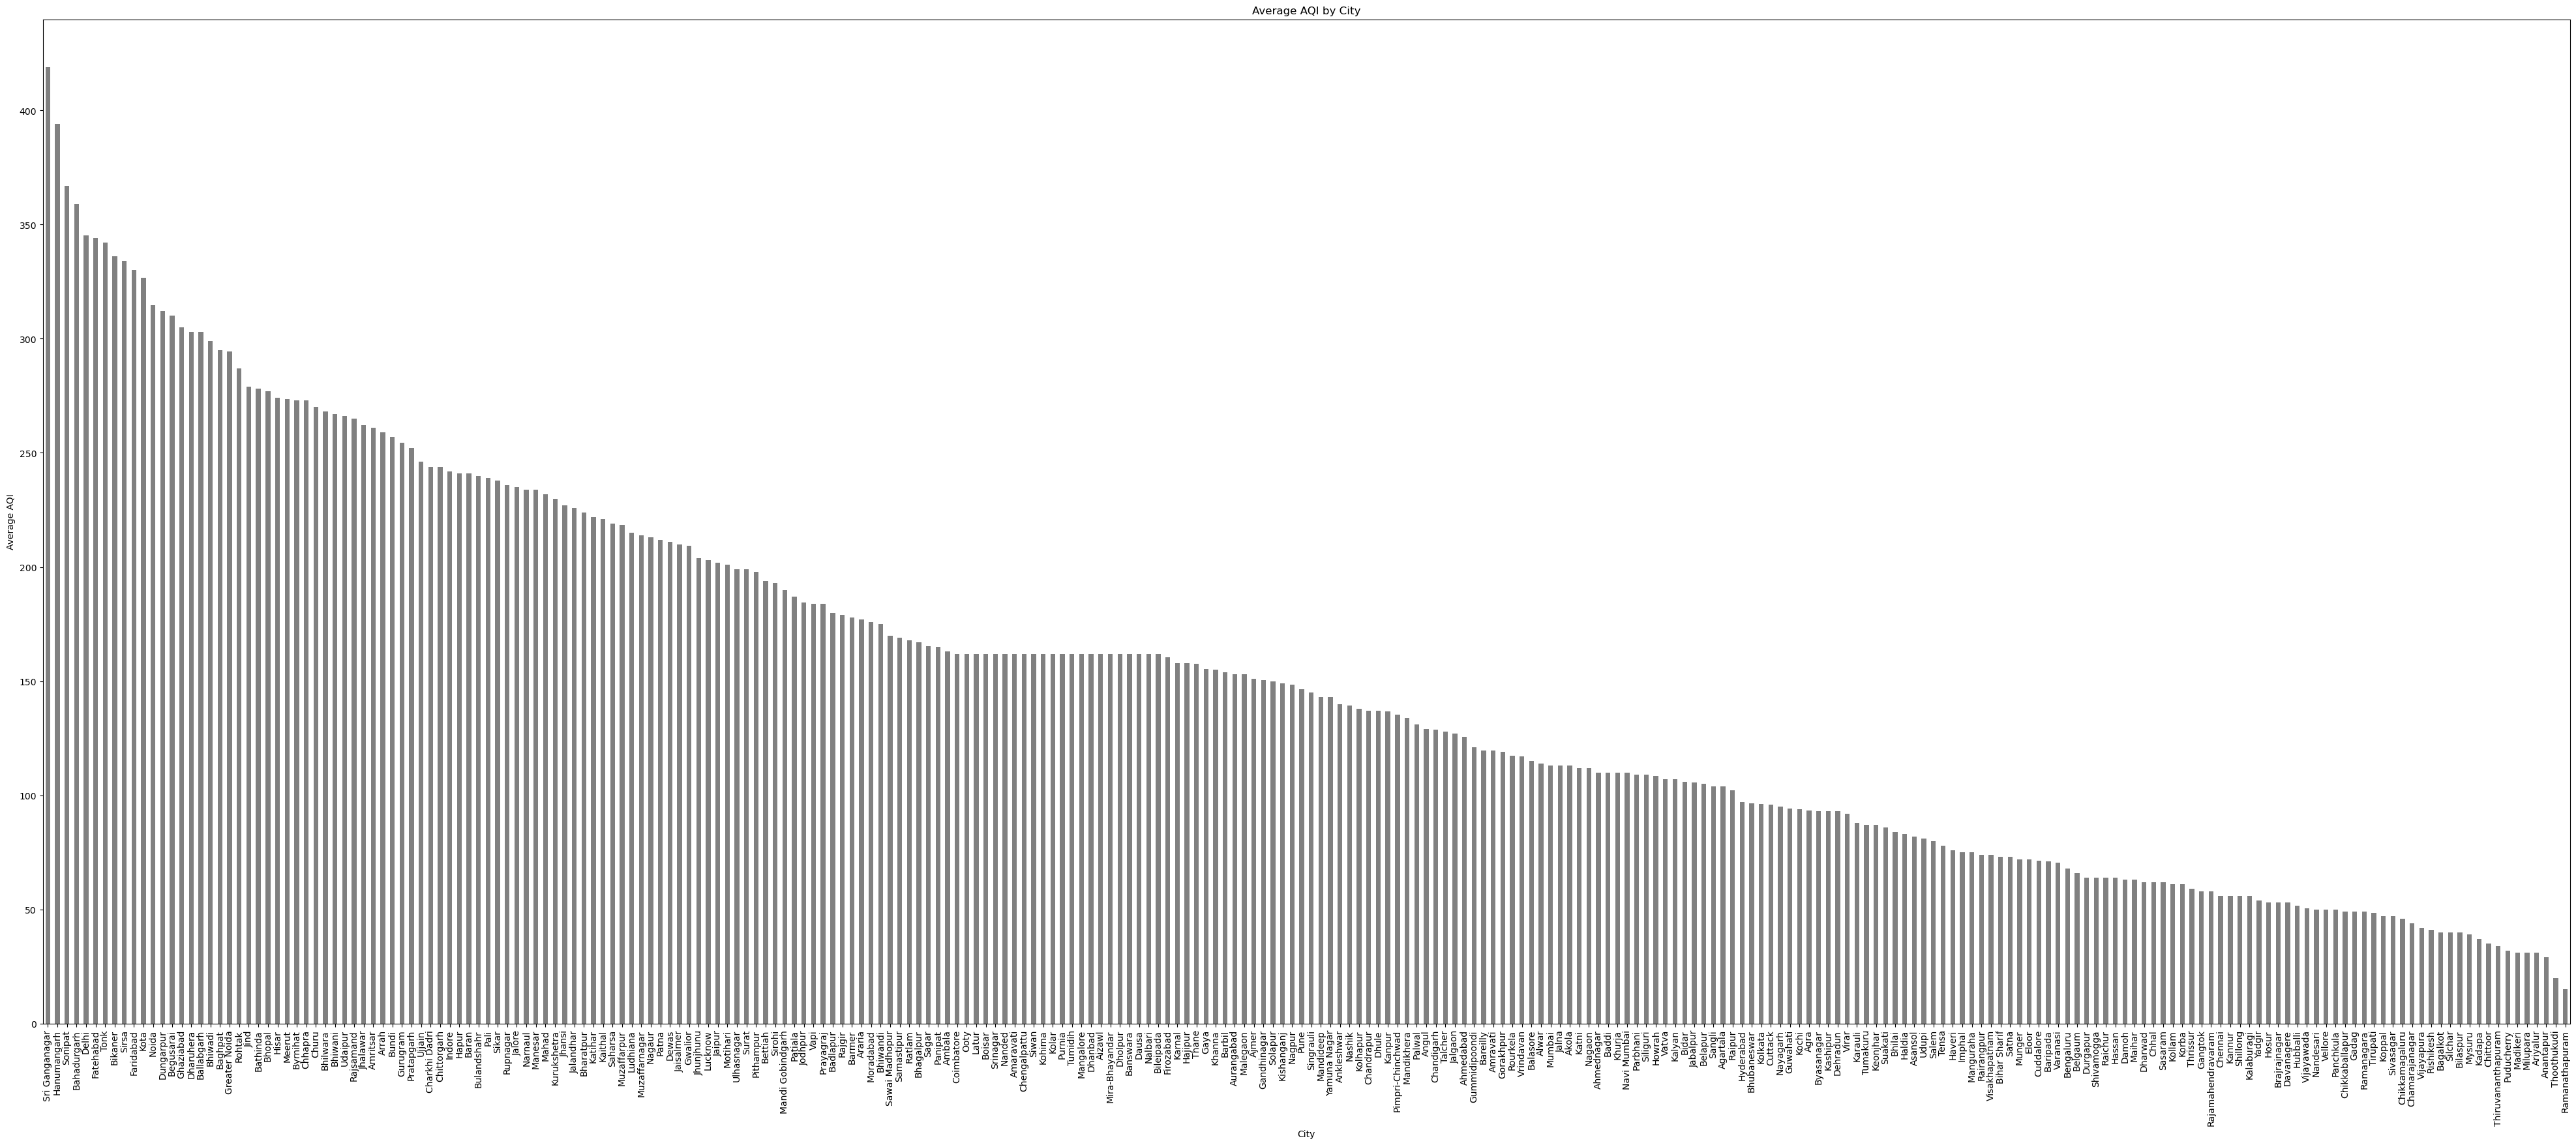

In [14]:
plt.figure(figsize=(50,20))
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
city_aqi.plot(kind='bar',color='grey')
plt.title('Average AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()


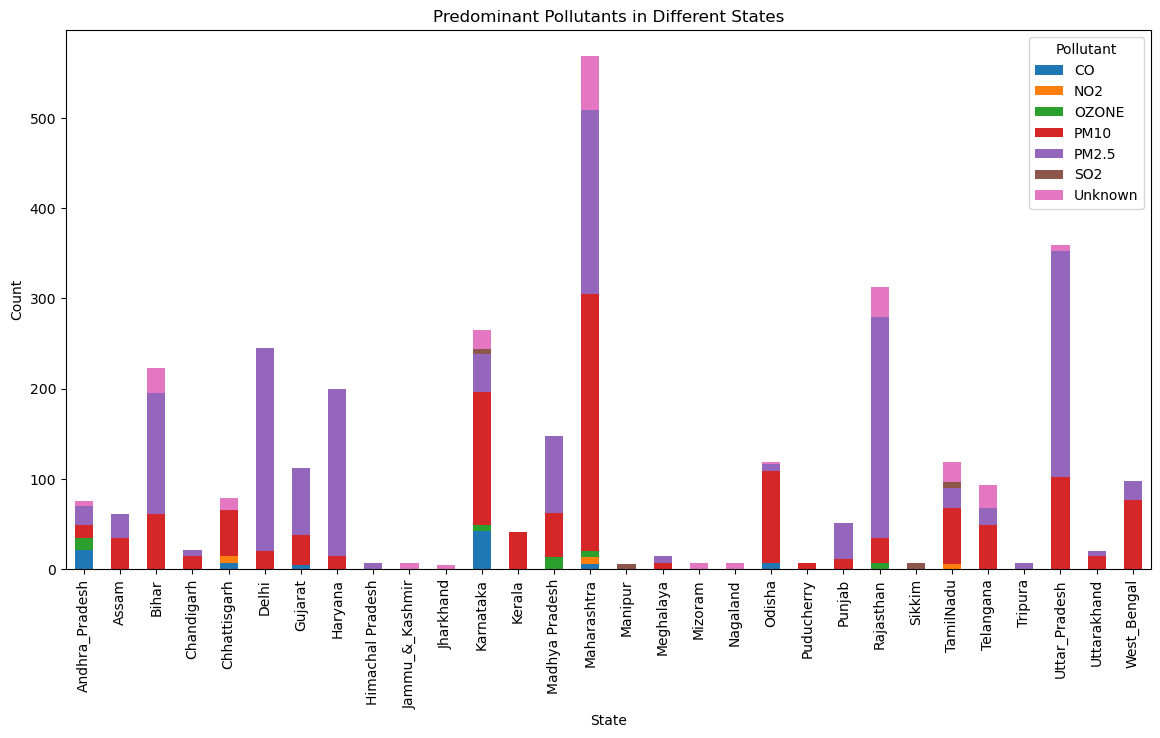

In [15]:
predominant_pollutants = df.groupby(['State', 'Predominant Parameter']).size().unstack().fillna(0)
predominant_pollutants.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Predominant Pollutants in Different States')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Pollutant')
plt.show()

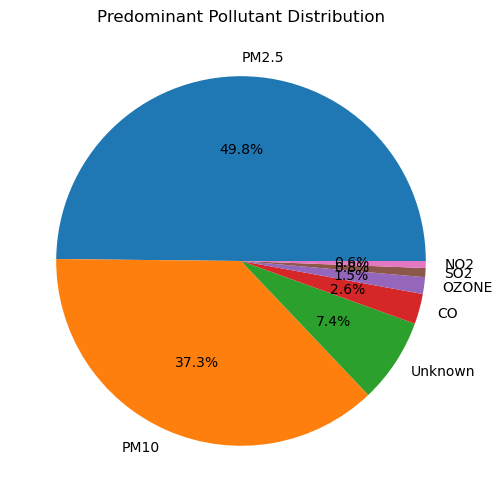

In [16]:
predominant_pollutants = df['Predominant Parameter'].value_counts()
plt.figure(figsize=(10, 6))
predominant_pollutants.plot(kind='pie', autopct='%1.1f%%')
plt.title('Predominant Pollutant Distribution')
plt.ylabel('')
plt.show()

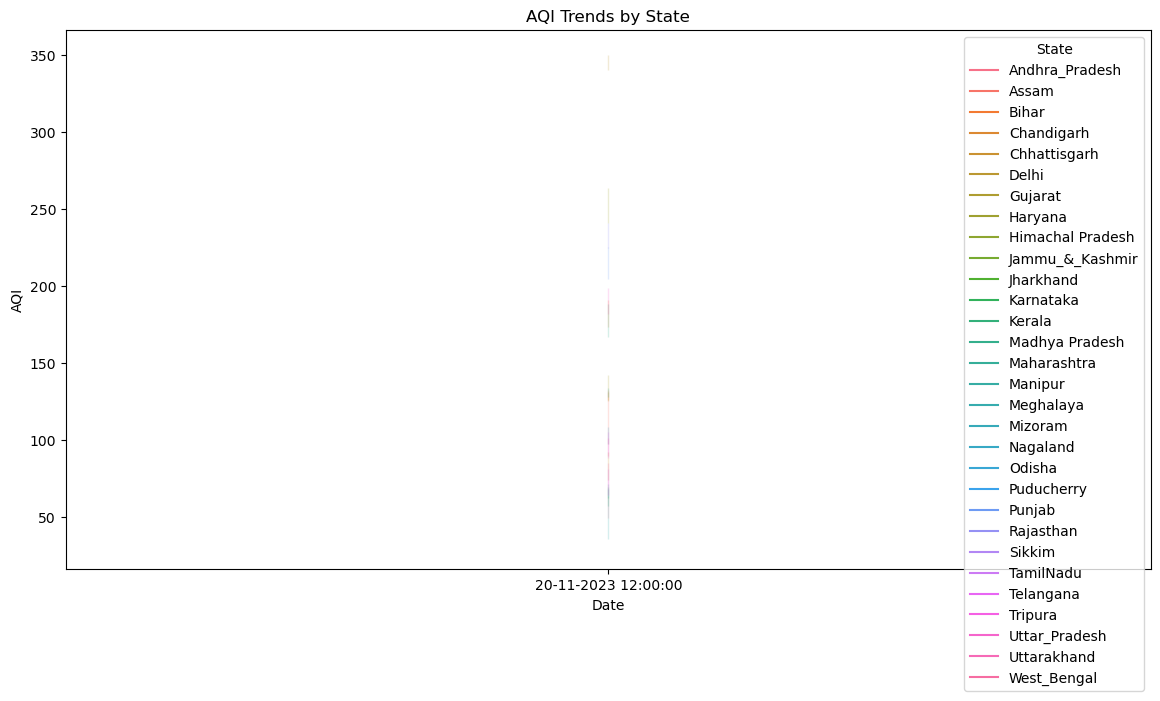

In [17]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Last Update', y='AQI', hue='State', data=df)
plt.title('AQI Trends by State')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

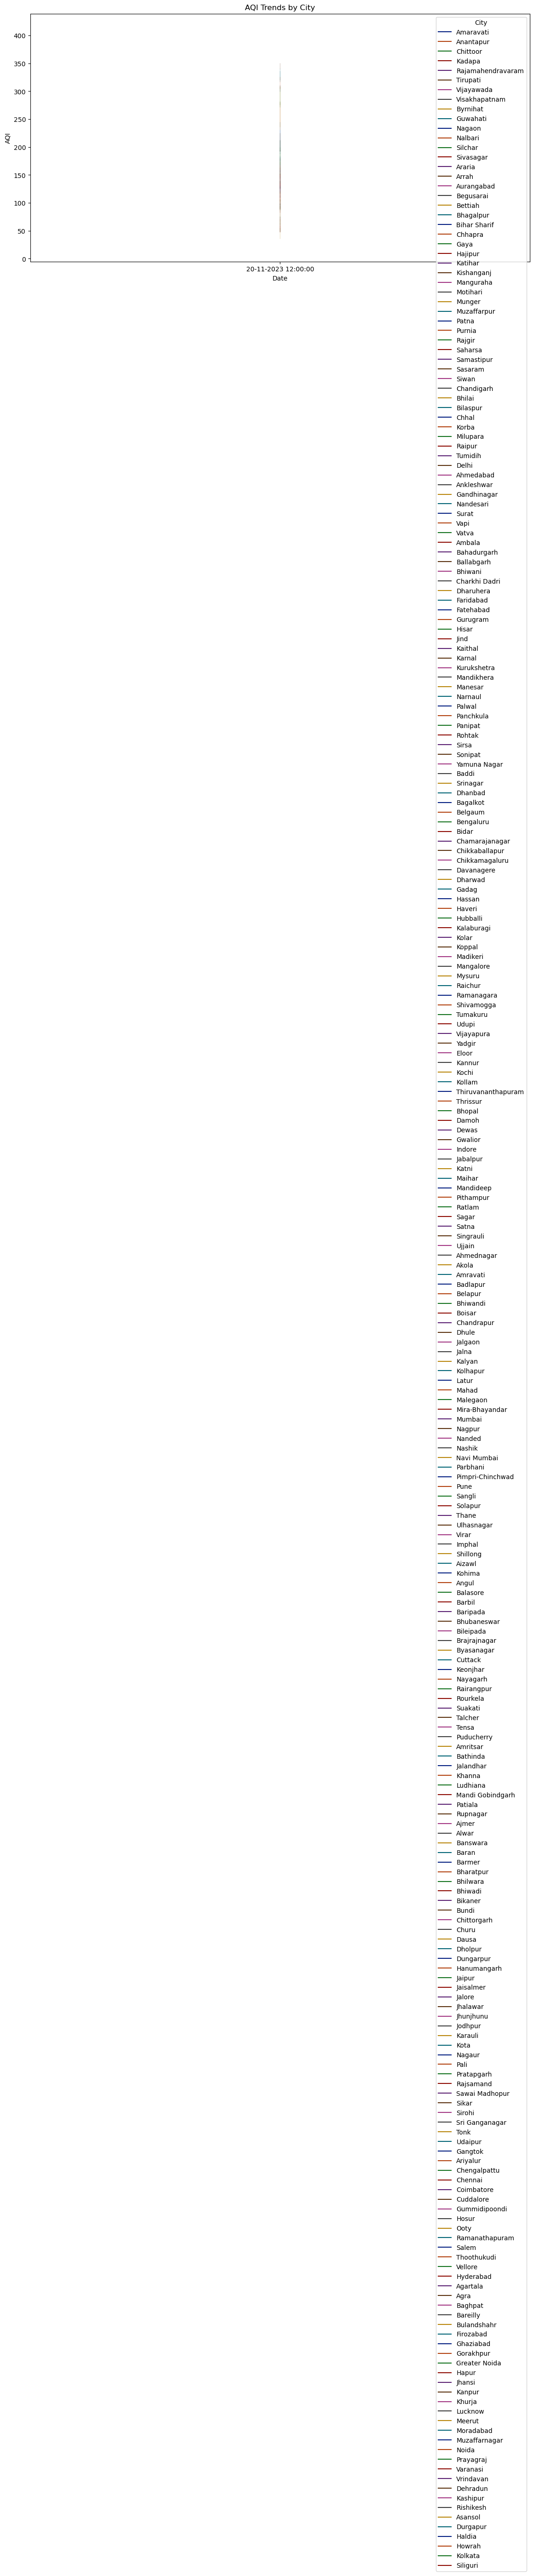

In [18]:
plt.figure(figsize=(14, 7))
dark_palette = sns.color_palette("dark", n_colors=len(df['City'].unique()))
sns.lineplot(x='Last Update', y='AQI', hue='City', data=df, palette=dark_palette)
plt.title('AQI Trends by City')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

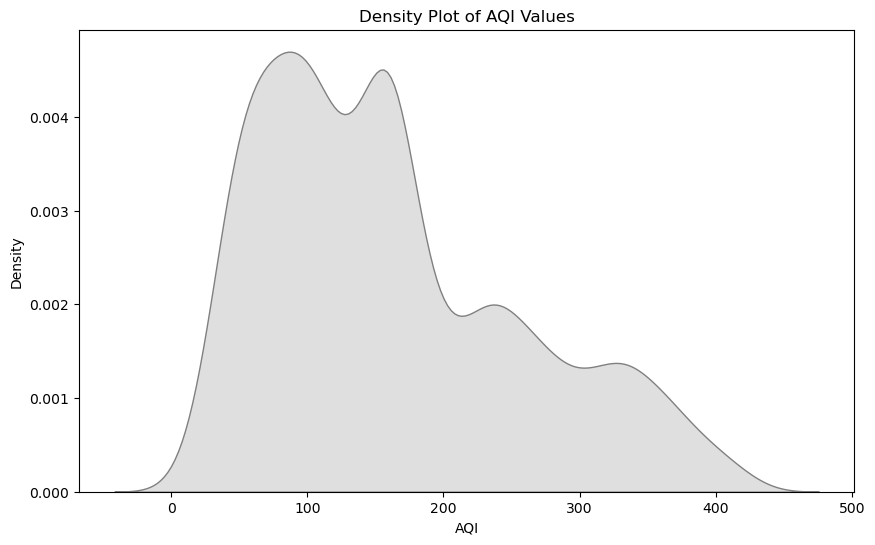

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['AQI'], shade=True,color='grey')
plt.title('Density Plot of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Density')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

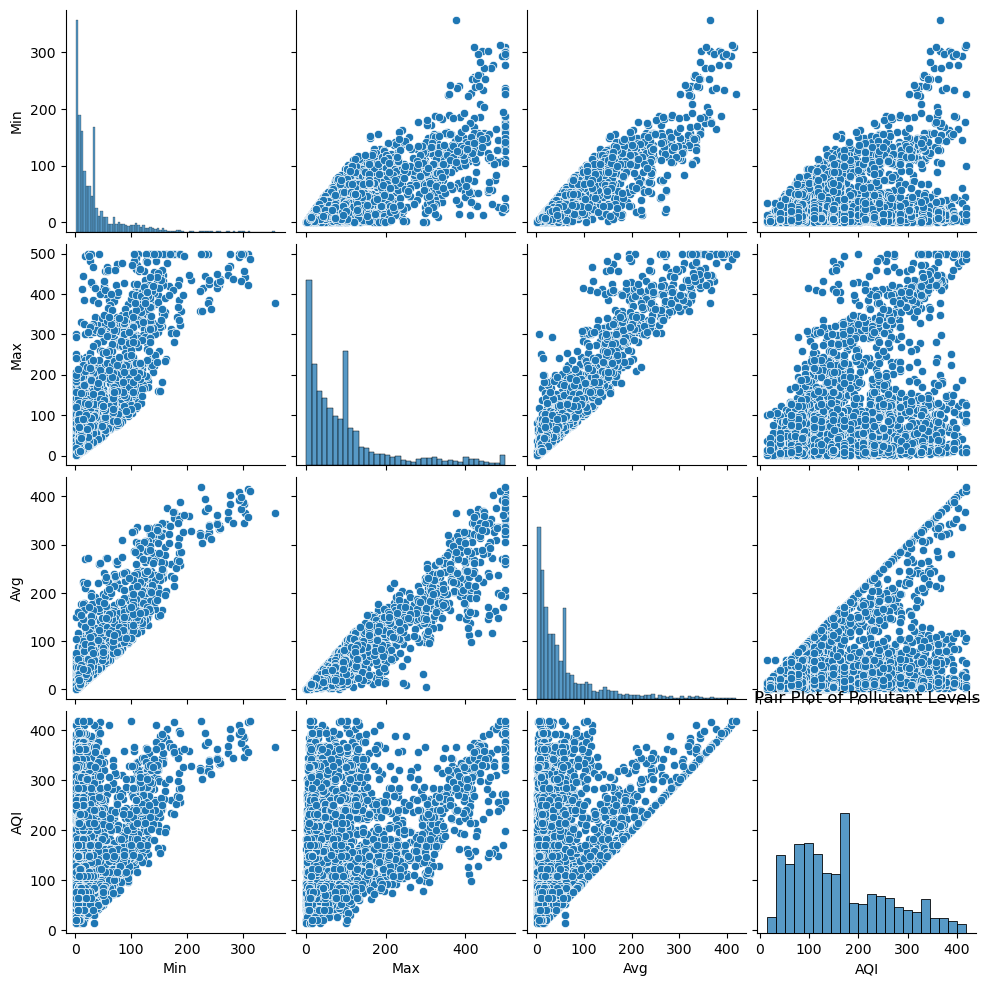

In [20]:
sns.pairplot(df[['Min', 'Max', 'Avg', 'AQI']], palette='grey')
plt.title('Pair Plot of Pollutant Levels')
plt.show

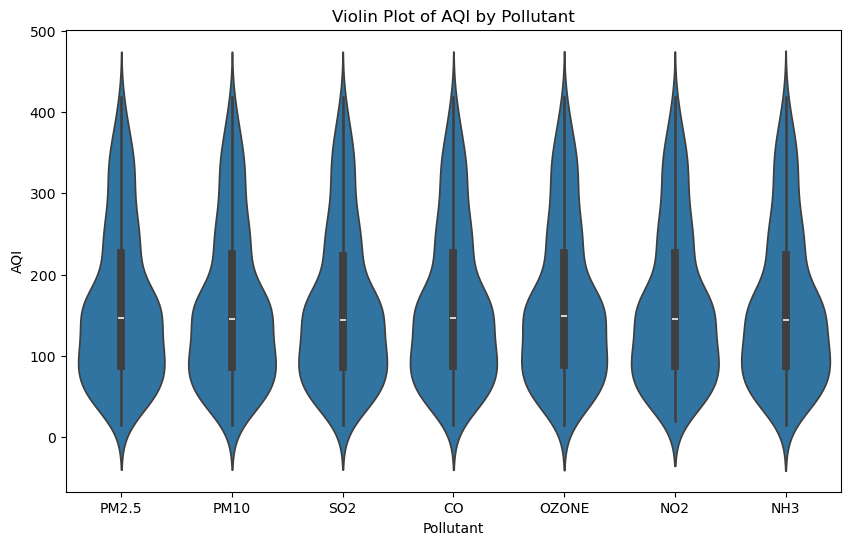

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pollutant', y='AQI', data=df)
plt.title('Violin Plot of AQI by Pollutant')
plt.xlabel('Pollutant')
plt.ylabel('AQI')
plt.show()

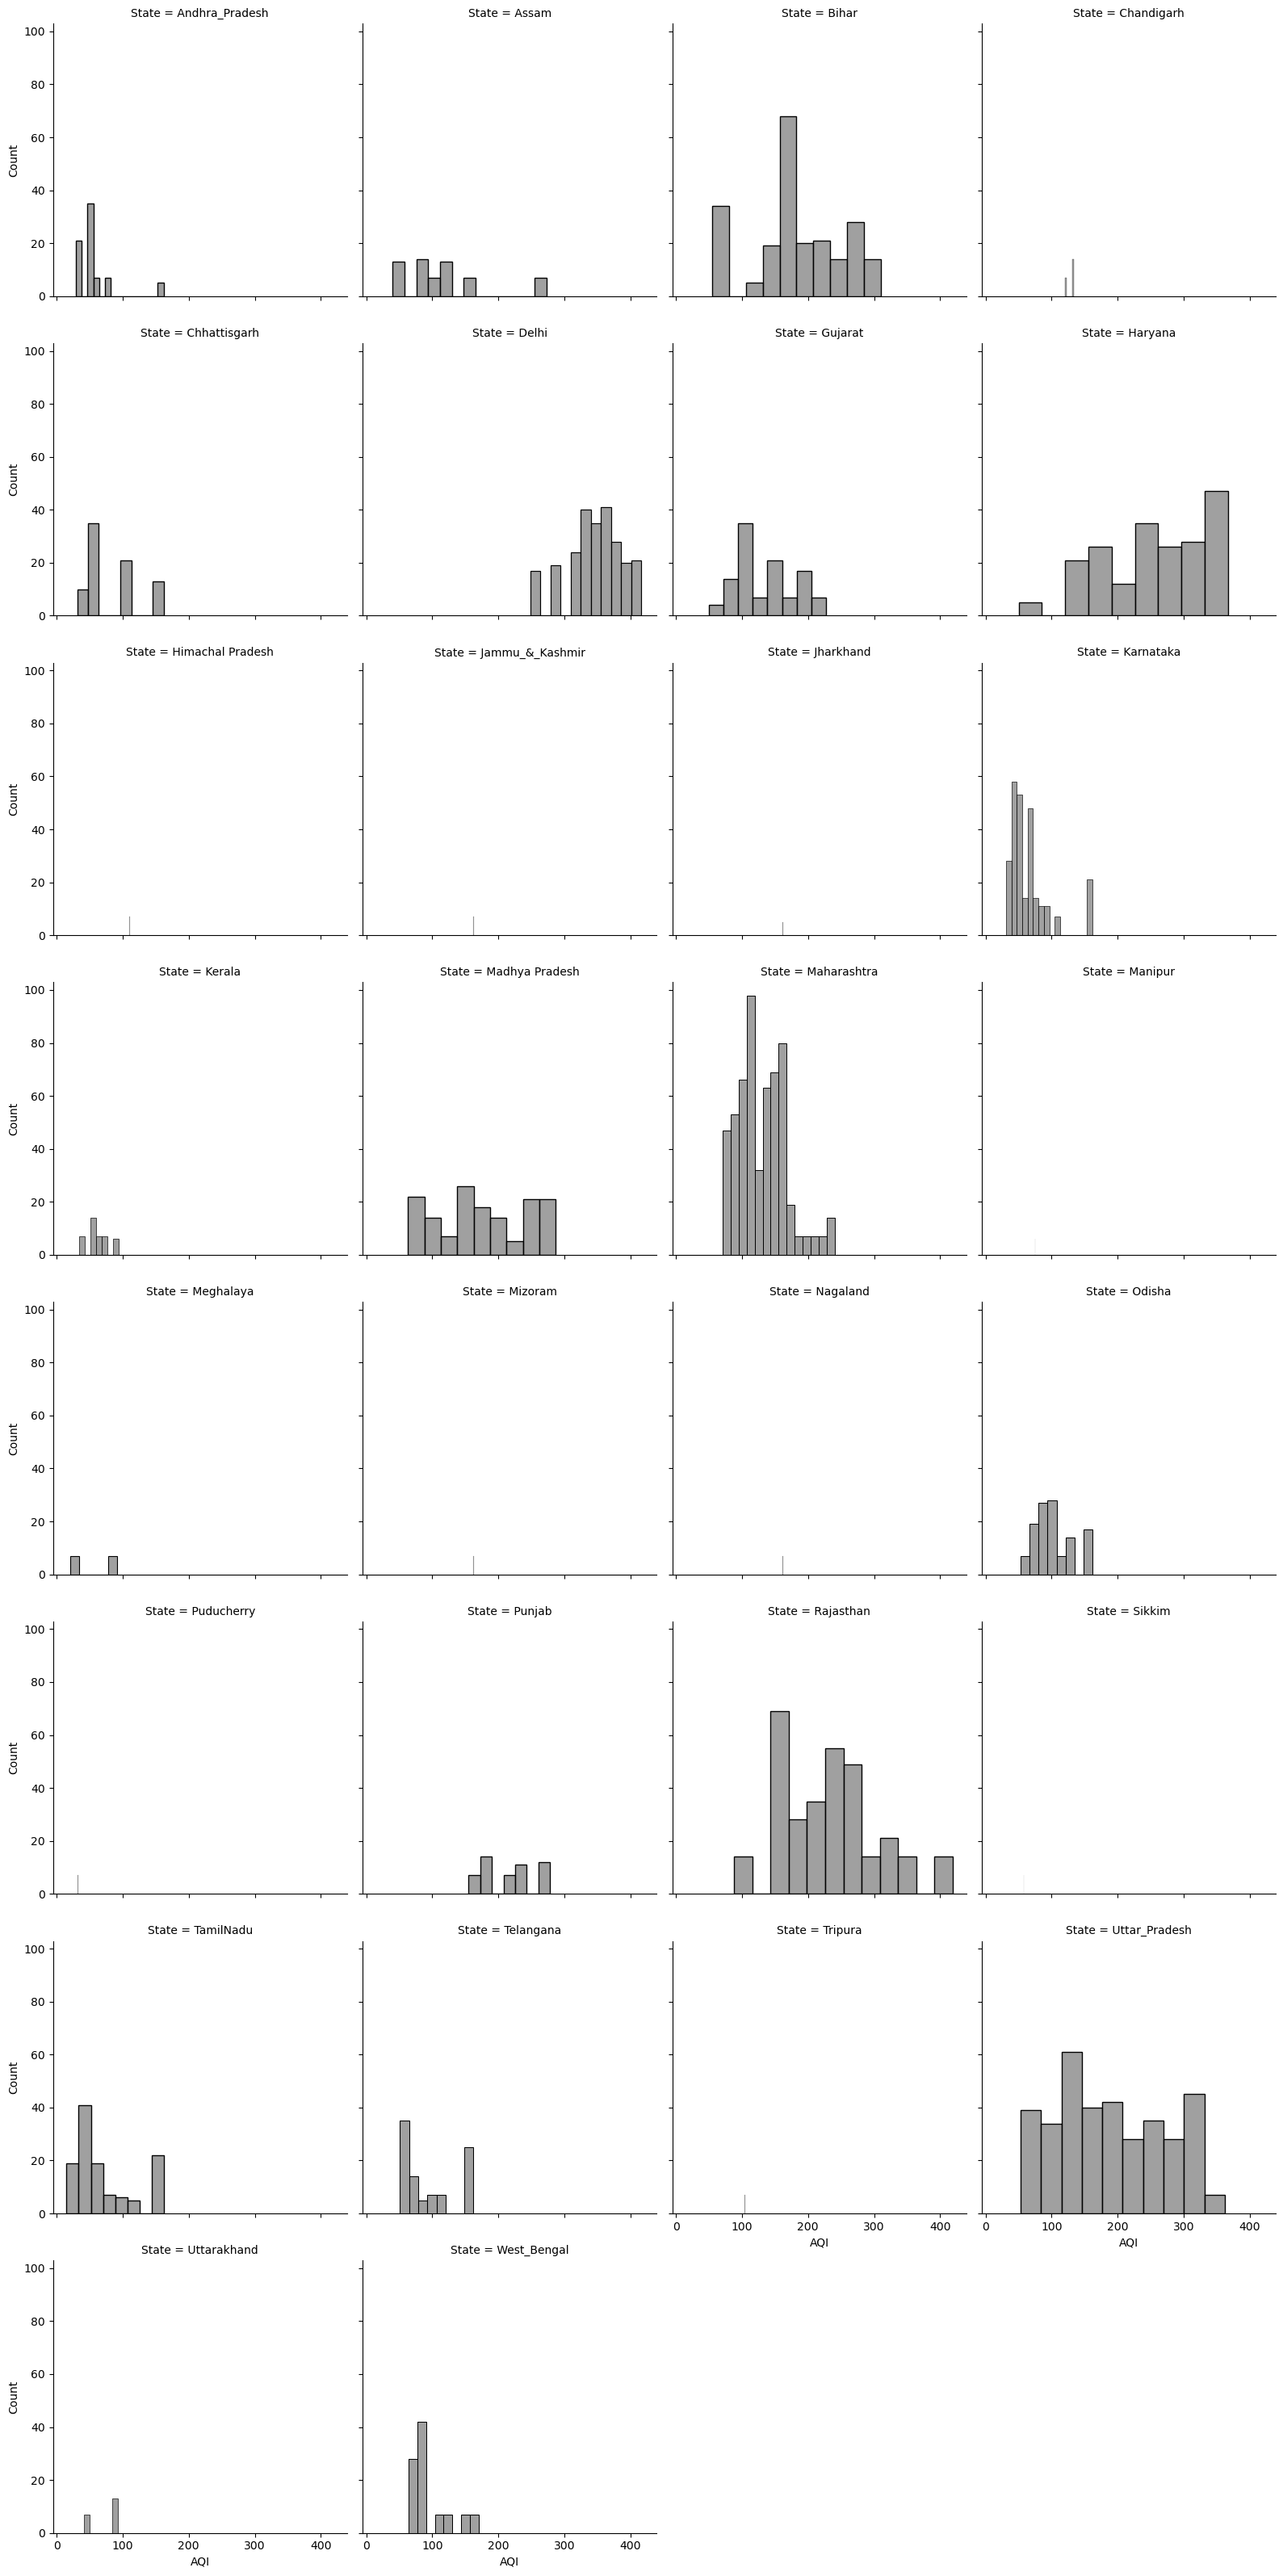

In [22]:
g = sns.FacetGrid(df, col='State', col_wrap=4, height=4)
g.map(sns.histplot, 'AQI', color='grey')  # Set the color to grey
plt.show()

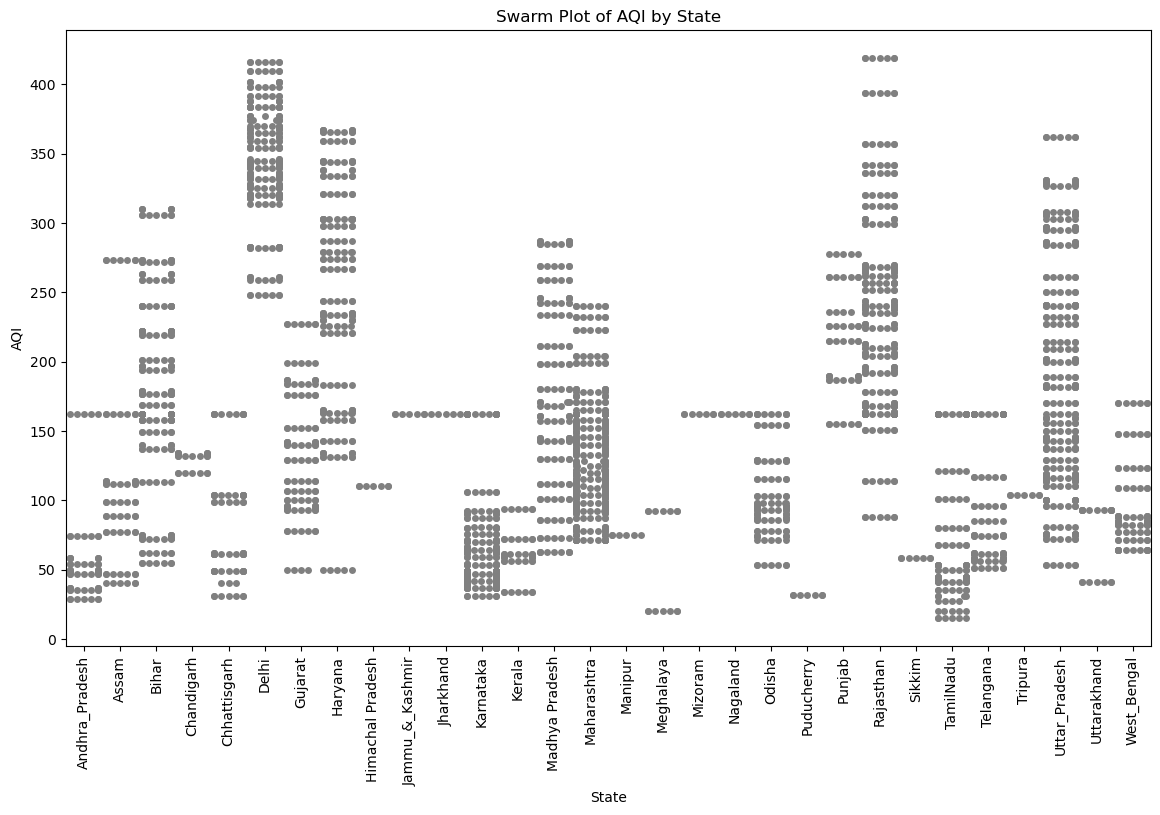

In [23]:
plt.figure(figsize=(14, 8))
sns.swarmplot(x='State', y='AQI', data=df, color='grey')
plt.title('Swarm Plot of AQI by State')
plt.xlabel('State')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

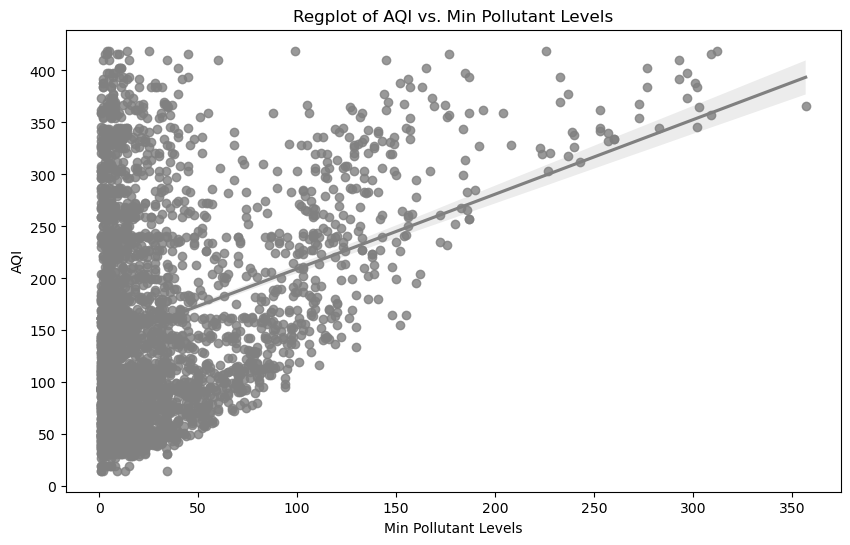

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Min', y='AQI', data=df,color='grey')
plt.title('Regplot of AQI vs. Min Pollutant Levels')
plt.xlabel('Min Pollutant Levels')
plt.ylabel('AQI')
plt.show()

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
X = df_encoded.drop(columns=['AQI'])  
y = df_encoded['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 23.22303851927788
R^2 Score: 0.9974837762405427


In [27]:
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X_train.columns)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 2000x1000 with 0 Axes>

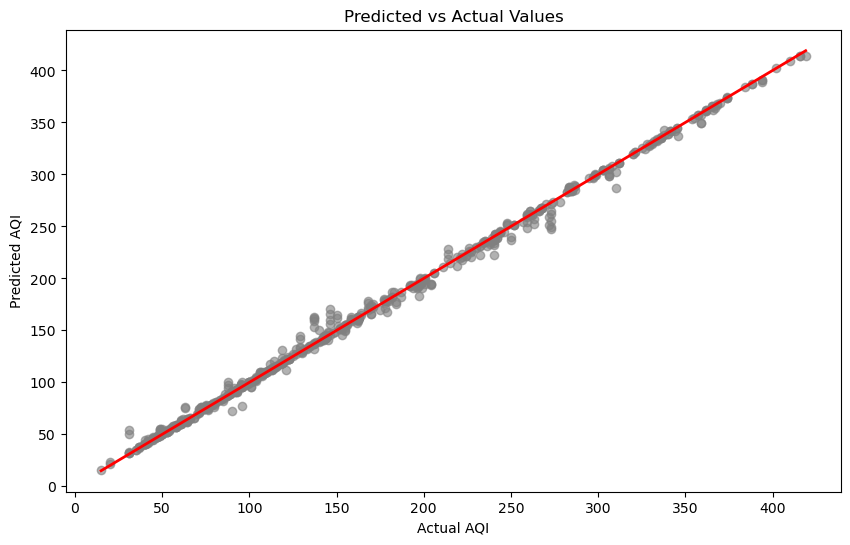

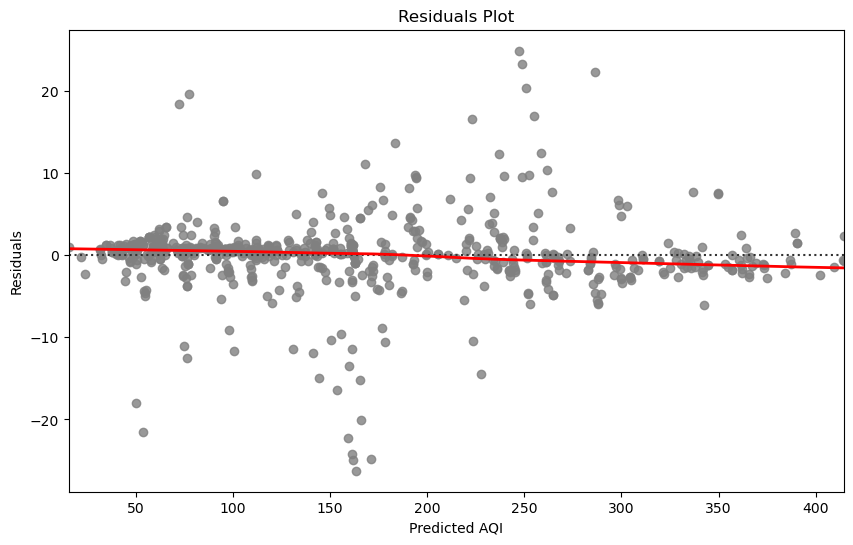

In [28]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='grey', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect prediction
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="grey", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()


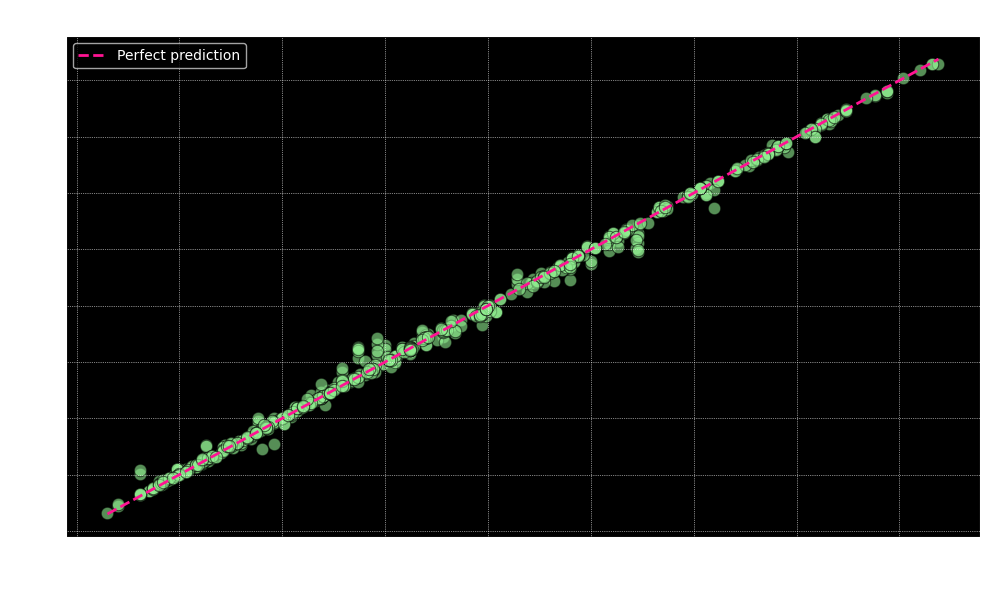

In [30]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')  # ← Врубаем тёмную тему

sns.scatterplot(x=y_test, y=y_pred, color='lightgreen', alpha=0.6, edgecolor='black', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='deeppink', lw=2, linestyle='--', label='Perfect prediction')

plt.title('Predicted vs Actual AQI', fontsize=16, color='white')
plt.xlabel('Actual AQI', color='white')
plt.ylabel('Predicted AQI', color='white')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tick_params(colors='white')  # ← Белые цифры на осях
plt.tight_layout()

# Сохраняем с прозрачным фоном
plt.savefig('predicted_vs_actual_dark.png', dpi=300, transparent=True)
plt.show()


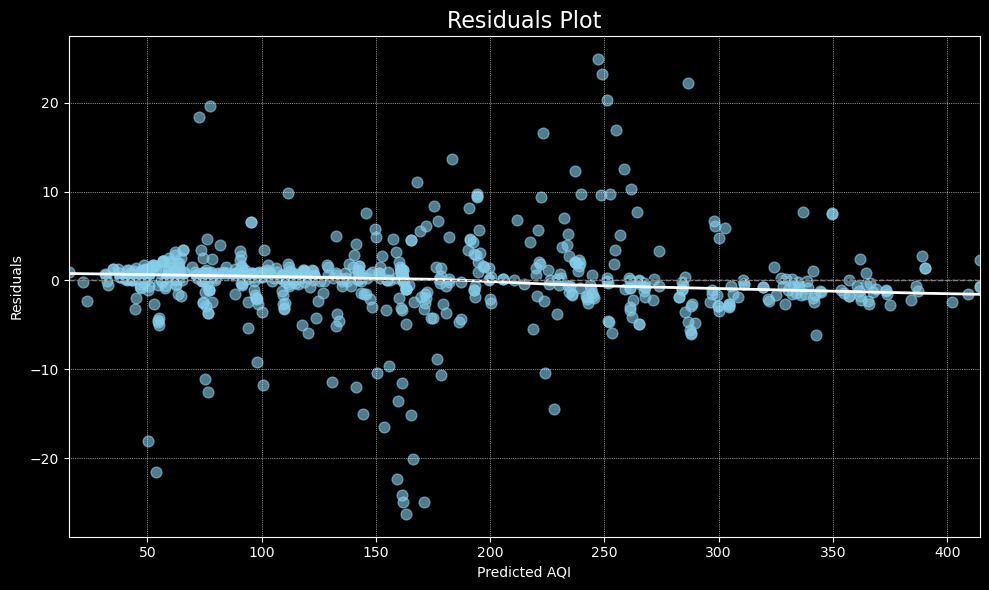

In [32]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

sns.residplot(x=y_pred, y=residuals, lowess=True,
              scatter_kws={'alpha': 0.6, 'color': 'skyblue', 's': 60},
              line_kws={'color': 'white', 'lw': 2})
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.title('Residuals Plot', fontsize=16, color='white')
plt.xlabel('Predicted AQI', color='white')
plt.ylabel('Residuals', color='white')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tick_params(colors='white')
plt.tight_layout()

# Сохраняем как PNG с прозрачностью
plt.savefig('residuals_plot_dark.png', dpi=300, transparent=True)
plt.show()


In [38]:
plt.figure(figsize=(20, 10))
plt.style.use('dark_background')

plot_tree(
    rf_model.estimators_[0],  # Первое дерево
    feature_names=X.columns,  # Названия признаков
    filled=True,              # Цветная заливка
    rounded=True,             # Закругленные углы
    fontsize=10,              # Размер шрифта
    impurity=True,            # Показывать меру неоднородности
    proportion=False          # Показывать абсолютные значения
)

plt.title('Best Decision Tree from Random Forest', fontsize=16, color='white')
plt.tight_layout()
plt.show()

NameError: name 'rf_model' is not defined

<Figure size 2000x1000 with 0 Axes>

In [46]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
